In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.stattools import adfuller
from functions.find_bubbles import *
from matplotlib import style

In [2]:
style.use('ggplot')

## Detecting bubbles

Based on: https://itamarcaspi.github.io/psymonitor/articles/illustrationSNP.html

In [3]:
snp = pd.read_csv('snp.csv', index_col='date')

In [4]:
y = 1 / snp.value

In [5]:
obs = len(y)
r0 = 0.01 + 1.8/np.sqrt(obs)
swindow0 = int(math.floor(r0*obs))
dim = obs - swindow0 + 1
IC = 2
adflag = 6
yr = 2
Tb = 12*yr + swindow0 - 1
nboot = 99

Next, we run the test and simulate critical values via the bootstrap.

In [6]:
bsadfs = PSY(y, swindow0, IC, adflag)
quantilesBsadf = cvPSYwmboot(y, swindow0, IC, adflag, Tb, nboot=199)

The identified origination and termination dates can be calculated and viewed with the following commands:

In [7]:
monitorDates = snp.iloc[swindow0-1:obs].index
quantile95 = np.dot(np.array([quantilesBsadf]).T, np.ones([1, dim]))
ind95 =(bsadfs.T[0] > quantile95[1, ])
periods = monitorDates[ind95]

Identify the start and end dates

In [8]:
bubbly_dates = find_sequences_datetime(periods, monitorDates)

## Plot the bubble

In [9]:
y.index = pd.to_datetime(snp.index)

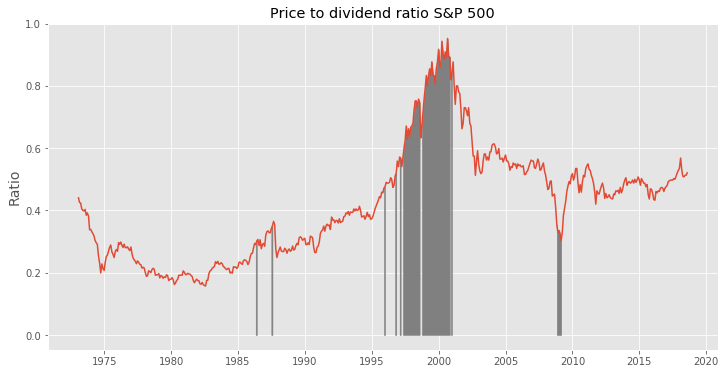

In [10]:
fig, ax1 = plt.subplots(1, 1, figsize=(12,6))

ax1.plot(pd.to_datetime(snp.index), y)

for loc in range(len(bubbly_dates)):
    bub_period = bubble_period(pd.to_datetime(snp.index) , bubbly_dates.iloc[loc])
    ax1.fill_between(bub_period , y[bub_period], color='grey')
    
ax1.set_title('Price to dividend ratio S&P 500')
ax1.set_ylabel('Ratio', fontsize='14')

fig.savefig('sp500_bubbel.png')

## Moments from the bubble
- average duration
- variance in the duration
- skew in the distribution of the duration? 
- 